<a href="https://colab.research.google.com/github/GreenGrasshopper28/digit-recognizer/blob/main/part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)


In [4]:
#!pip install opencv-contrib-python-headless==4.1.2.30 --quiet
#!pip install cvlib --quiet

In [5]:
#!pip install tensorflow-cpu

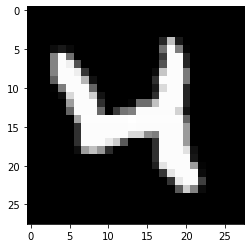

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[20],cmap='gray')


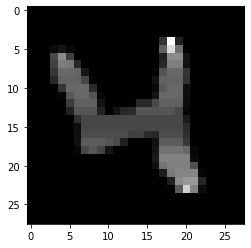

In [7]:
x_train=keras.utils.normalize(x_train)
import matplotlib.pyplot as plt
plt.imshow(x_train[20],cmap='gray')


In [8]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
#from keras.utils import to_categorical()
#to_categorical(y_train[0])
import tensorflow as tf
tf.keras.utils.to_categorical(y_train[0])

array([0., 0., 0., 0., 0., 1.], dtype=float32)

In [10]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(500,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [12]:
history=model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2340 - accuracy: 0.9307
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0948 - accuracy: 0.9717
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0613 - accuracy: 0.9812
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0426 - accuracy: 0.9871
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0326 - accuracy: 0.9899


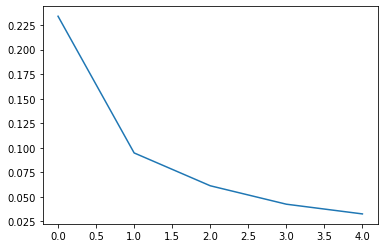

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [14]:
model.fit(x_train,y_train,epochs=20,validation_data=(x_train,y_train))

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0133 - val_accuracy: 0.9963
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0180 - accuracy: 0.9943 - val_loss: 0.0117 - val_accuracy: 0.9967
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0136 - accuracy: 0.9959 - val_loss: 0.0115 - val_accuracy: 0.9963
Epoch 4/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.0092 - val_accuracy: 0.9972
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0088 - val_accuracy: 0.9970
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0064 - val_accuracy: 0.9981
Epoch 7/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0091 - val_ac

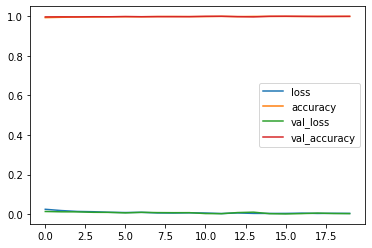

In [15]:
import pandas as pd
loss=pd.DataFrame(model.history.history)
loss.plot()

In [16]:
import numpy as np
y_pred=model.predict(x_test)  # classification gives output in form of probability
y_pred=np.argmax(y_pred,axis=1) # 
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_pred,y_test)

array([[ 970,    0,    1,    0,    0,    1,    6,    2,    2,    2],
       [   0, 1124,    0,    0,    1,    2,    2,    1,    1,    2],
       [   1,    4, 1011,    9,    3,    2,    0,   21,    5,    0],
       [   1,    1,    4,  984,    0,   22,    1,    3,    8,    6],
       [   1,    0,    4,    1,  970,    8,   15,    2,    6,   21],
       [   0,    1,    1,    1,    0,  830,    1,    0,    2,    0],
       [   3,    4,    2,    0,    1,    2,  929,    0,    0,    1],
       [   2,    1,    6,    3,    1,    1,    1,  993,    3,    6],
       [   2,    0,    3,    2,    1,   10,    3,    1,  940,    0],
       [   0,    0,    0,   10,    5,   14,    0,    5,    7,  971]])

In [18]:
accuracy_score(y_pred,y_test)

0.9722

In [19]:
model.save('DIGIT.hdf5')